<a href="https://colab.research.google.com/github/luqmansen/notebook-collection/blob/master/Austin_zoning_CNN_5_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/My Drive/Colab Notebooks/CNN-austin-zoning'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks/CNN-austin-zoning


In [0]:
!wget 'https://storage.googleapis.com/kaggle-data-sets/8857/12355/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1587221111&Signature=bpwgfs1oAeNOe%2B2u41kzQWvUvb7a7cZ1OLkkjfFn%2F7RWt876RaoGjlcNzrAC7Zrm2JzvHIGb7DcG0sOMG5%2BNZzd2bN4Ad2iBzckNl4QpmPz54lc3EOj7w9e4C1Dn14PRxhzXUR%2BwFcNPHIYvj6SdKoGRLqtwq%2FaBV%2B4ZnXWTaPlUX9v9NVt7afFhcNoRE%2FJuhXpFNOeTFDKZmm%2B3zRoBYhg6p1Ma%2F4B9ZsB1Qbhj88LSJqzm6Xqwup3vBpnZl7vL2U9fUkcvt9Kjt00JWv%2FxZzOI666nsFpmSLMn006pHL4hm1hh4ASMQwft%2BUOF%2FxY1U427pLg7f9Nvk9spmMSPPA%3D%3D&response-content-disposition=attachment%3B+filename%3Daustin-zoning-satellite-images.zip'

The name is too long, 544 chars total.
Trying to shorten...
New name is archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1587221111&Signature=bpwgfs1oAeNOe+2u41kzQWvUvb7a7cZ1OLkkjfFn%2F7RWt876RaoGjlcNzrAC7Zrm2JzvHIGb7DcG0sOMG5+NZzd2bN4Ad2iBzckNl4QpmPz54lc3EOj7w9e4C1Dn14PRxhz.
--2020-04-16 03:10:06--  https://storage.googleapis.com/kaggle-data-sets/8857/12355/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1587221111&Signature=bpwgfs1oAeNOe%2B2u41kzQWvUvb7a7cZ1OLkkjfFn%2F7RWt876RaoGjlcNzrAC7Zrm2JzvHIGb7DcG0sOMG5%2BNZzd2bN4Ad2iBzckNl4QpmPz54lc3EOj7w9e4C1Dn14PRxhzXUR%2BwFcNPHIYvj6SdKoGRLqtwq%2FaBV%2B4ZnXWTaPlUX9v9NVt7afFhcNoRE%2FJuhXpFNOeTFDKZmm%2B3zRoBYhg6p1Ma%2F4B9ZsB1Qbhj88LSJqzm6Xqwup3vBpnZl7vL2U9fUkcvt9Kjt00JWv%2FxZzOI666nsFpmSLMn006pHL4hm1hh4ASMQwft%2BUOF%2FxY1U427pLg7f9Nvk9spmMSPPA%3D%3D&response-content-disposition=attachment%3B+filename%3Daustin-zoning-satellite-images.zip
Resolving storage.googleapis.com (

In [0]:
!unzip -q archive*

In [0]:
from __future__ import print_function
import pandas as pd
import shutil
import os
import sys
import numpy as np

In [0]:
train_dir = 'train_dir_sep/'
src_dir = 'data/'
if not os.path.exists(train_dir):
    os.mkdir(train_dir)

In [45]:
labels = pd.read_csv("data/austin.csv", index_col=0)
labels = labels.drop('zoning_id',1)
labels

,image_name,zoning_zty
0,data/austin_0.jpg,PUD
1,data/austin_1.jpg,PUD
2,data/austin_2.jpg,I-RR
3,data/austin_3.jpg,PUD
4,data/austin_4.jpg,PUD
...,...,...
3662,data/austin_3662.jpg,PUD
3663,data/austin_3663.jpg,PUD
3664,data/austin_3664.jpg,PUD
3665,data/austin_3665.jpg,PUD


In [0]:
RESIDENTIAL = ["LA","RR","SF-1","SF-2","SF-3","SF-4A","SF-4B","SF-5","SF-6","MF-1","MF-2","MF-3","MF-4","MF-5","MF-6","MH"]
INDUSTRIAL = ["IP","LI","MI", "R&D"]
COMMERCIAL = ["NO","LO","GO","CR","LR","GR","L","CBD","DMU","W/LO","CS","CS-1","CH"]
SPECIAL = ["DR", "AV", "AG", "P", "PUD", "TN"]
COMBINE = ["-CO", "-H", "-MU", "-NP", "-PDA", "-V"]

In [0]:
def check_combine(string):
  for i in COMBINE:
    if i in string:
      return True
  return False

In [0]:
for filename, zoning_class in labels.values:
  filename = filename.replace('data/','')
  
  if zoning_class in RESIDENTIAL:
    zoning_class = 'RESIDENTIAL'
  elif zoning_class in INDUSTRIAL:
    zoning_class = 'INDUSTRIAL'
  elif zoning_class in COMMERCIAL:
    zoning_class = 'COMMERCIAL'
  elif zoning_class in SPECIAL:
    zoning_class = 'SPECIAL'
  elif check_combine(zoning_class):
    zoning_class = 'COMBINE'
  else:
    zoning_class = 'UNCATEGORIZED'

  if not os.path.exists(train_dir + zoning_class):
    os.mkdir(train_dir + zoning_class)

  src_path = src_dir + filename
  dst_path = train_dir + zoning_class + "/" + filename

  try:
    shutil.copy(src_path, dst_path)
  except IOError as e:
    print('Unable to copy file {} to {}, error {}'.format(src_path, dst_path, e))
  except:
      print('When try copy file {} to {}, unexpected error: {}'
              .format(src_path, dst_path, sys.exc_info()))

In [47]:
!find train_dir_sep/COMMERCIAL/ -type f -print | wc -l

122


In [48]:
!find train_dir_sep/INDUSTRIAL/ -type f -print | wc -l

62


In [49]:
!find train_dir_sep/RESIDENTIAL/ -type f -print | wc -l

804


In [80]:
!find train_dir_sep/SPECIAL/ -type f -print | wc -l

1000


In [81]:
!find train_dir_sep/COMBINE/ -type f -print | wc -l

1241


In [71]:
!find train_dir_sep/UNCATEGORIZED/ -type f -print | wc -l

438


In [79]:
!find train_dir_sep/ -type f -print | wc -l

3667


Arsitektur Keras untuk Multi-label classification
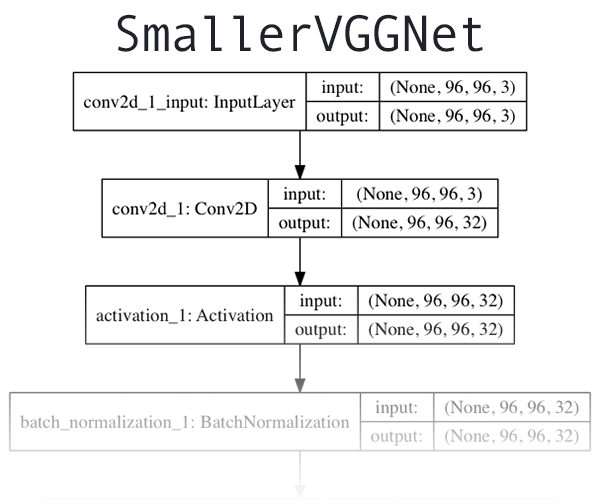

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

In [23]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
class SmallerVGGNet:
  @staticmethod
  def build(width, height, depth, classes, finalAct="softmax"):

    model = tf.keras.Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first":
      inputShape = (depth, height, width)
      chanDim = 1

    
    # CONV => RELU => POOL
    # 32 filter dengan kernel 3x3
    model.add(Conv2D(32, (3, 3), padding="same",
      input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))
  
    # (CONV => RELU) * 2 => POOL
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
  
      # (CONV => RELU) * 2 => POOL
    model.add(Conv2D(128, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(128, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # first (and only) set of FC => RELU layers
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    # use a *softmax* activation for single-label classification
    # and *sigmoid* activation for multi-label classification
    model.add(Dense(classes))
    model.add(Activation(finalAct))
    
    # return the constructed network architecture
    return model

Untuk training

In [0]:
import matplotlib
matplotlib.use("Agg")
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imutils import paths
import imutils
import numpy as np
import argparse
import random
import pickle
import cv2
import os

In [0]:
EPOCHS = 150
INIT_LR = 1e-3
BS = 32
IMAGE_DIMS = (96, 96, 3)


In [0]:
imagePaths = sorted(list(paths.list_images(train_dir)))
random.seed(42)
random.shuffle(imagePaths)

data = []
labels = []

In [57]:
if not os.path.isfile('processed_data_new.npy') and not os.path.isfile('processed_labels_new.npy'):
  for (i, imagePath) in enumerate(imagePaths):
      
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
    image = img_to_array(image)
    data.append(image)

    l = label = imagePath.split(os.path.sep)[-2]
    labels.append(l)
    if i > 0 and i % 500 == 0:
        print("[INFO] processed {}/{}".format(i, len(imagePaths)))
  np.save('processed_data_new.npy', data)
  np.save('processed_labels_new.npy', labels)

[INFO] processed 500/3667
[INFO] processed 1000/3667
[INFO] processed 1500/3667
[INFO] processed 2000/3667
[INFO] processed 2500/3667
[INFO] processed 3000/3667
[INFO] processed 3500/3667


In [0]:
data = np.load('processed_labels_new.npy')
labels = np.load('processed_data_new.npy')

In [58]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print("[INFO] data matrix: {:.2f}MB".format(	data.nbytes / (1024 * 1000.0)))
# binarize the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.2, random_state=42)

[INFO] data matrix: 792.07MB


In [33]:
lb.classes_

array(['COMMERCIAL', 'INDUSTRIAL', 'RESIDENTIAL', 'SPECIAL',
       'UNCATEGORIZED'], dtype='<U13')

In [0]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
	horizontal_flip=True, fill_mode="nearest")

In [60]:
print("[INFO] compiling model...")
model = SmallerVGGNet.build(
    width=IMAGE_DIMS[1],
    height=IMAGE_DIMS[0],
    depth=IMAGE_DIMS[2],
    classes=len(lb.classes_))

opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

model.compile(
    loss="categorical_crossentropy",
    optimizer=opt,
    metrics=["accuracy"])
model.summary()

[INFO] compiling model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (

In [61]:
import time
print("[INFO] training network...")
start_time = time.time()
with tf.device('/device:GPU:0'):
  H = model.fit_generator(
    aug.flow(trainX, trainY, batch_size=BS),
    validation_data=(testX, testY),
    steps_per_epoch=len(trainX) // BS,
    epochs=EPOCHS, verbose=1)
print("[INFO] Elapsed time : %s seconds" % (time.time() - start_time))

[INFO] training network...
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/150
91/91 [==============================] - 8s 83ms/step - loss: 2.1071 - accuracy: 0.3657 - val_loss: 2.6641 - val_accuracy: 0.2834
Epoch 2/150
91/91 [==============================] - 7s 75ms/step - loss: 1.6927 - accuracy: 0.4161 - val_loss: 3.9372 - val_accuracy: 0.2834
Epoch 3/150
91/91 [==============================] - 7s 75ms/step - loss: 1.5645 - accuracy: 0.4433 - val_loss: 1.9832 - val_accuracy: 0.3174
Epoch 4/150
91/91 [==============================] - 7s 75ms/step - loss: 1.5376 - accuracy: 0.4519 - val_loss: 1.9308 - val_accuracy: 0.2956
Epoch 5/150
91/91 [==============================] - 7s 75ms/step - loss: 1.5413 - accuracy: 0.4378 - val_loss: 3.2435 - val_accuracy: 0.2847
Epoch 6/150
91/91 [==============================] - 7s 76ms/step - loss: 1.4864 - accuracy: 0.4712 - val_loss: 1.6604 - val_accuracy: 0.3202
Epoch 7/150
91/91 [==========================

In [62]:
# save the model to disk
print("[INFO] serializing network...")
model.save("result_new.model")
# save the label binarizer to disk
print("[INFO] serializing label binarizer...")
f = open("label_new.pickle", "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network...
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: result_new.model/assets
[INFO] serializing label binarizer...


In [0]:
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig("loss.jpg")

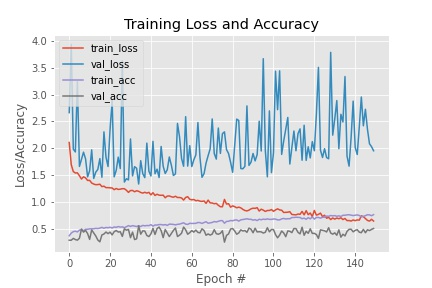

In [64]:
from IPython.display import Image
Image(filename='loss.jpg', width=700, height=500) 

**Testing**

In [0]:
model = load_model("result_new.model")
lb = pickle.loads(open("label_new.pickle", "rb").read())

In [76]:
!mkdir testing
!cp data/austin_0.jpg testing/SPECIAL_PUD.jpg
!cp data/austin_1361.jpg testing/COMMERCIAL_CBD.jpg
!cp data/austin_1441.jpg testing/INDUSTRIAL_RND.jpg
!cp data/austin_3262.jpg testing/INDUSTRIAL_IP.jpg
!cp data/austin_1919.jpg testing/COMBINE_LO-V-NP.jpg
!cp data/austin_270.jpg testing/RESIDENTIAL_SF-2.jpg



mkdir: cannot create directory ‘testing’: File exists


In [0]:
from google.colab.patches import cv2_imshow

In [0]:
def test(image_path, model, lb):
  import cv2
  image = cv2.imread(image_path)
  output = image.copy()
  
  # pre-process the image for classification
  image = cv2.resize(image, (96, 96))
  image = image.astype("float") / 255.0
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)

  # classify the input image
  print("[INFO] classifying image...")
  proba = model.predict(image)[0]
  idx = np.argmax(proba)
  label = lb.classes_[idx]
  
  filename = image_path[image_path.rfind(os.path.sep) + 1:]
  correct = "correct" if filename.rfind(label) != -1 else "incorrect"
  # build the label and draw the label on the image
  label = "{}: {:.2f}% ({})".format(label, proba[idx] * 100, correct)
  output = imutils.resize(output, width=400)
  cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
    0.7, (0, 255, 0), 2)
  # show the output image
  print("[INFO] {}".format(label))
  cv2_imshow(output)
  cv2.waitKey(0)

[INFO] classifying image...
[INFO] COMBINE: 50.42% (incorrect)


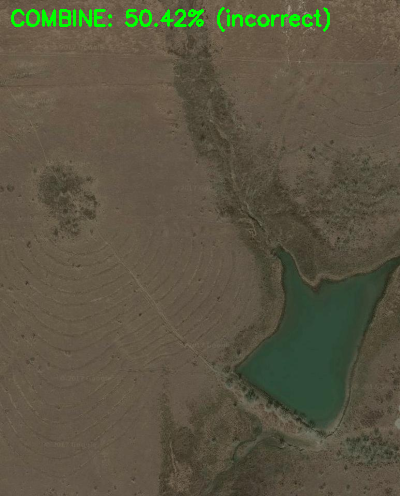

In [66]:
test('testing/SPECIAL_PUD.jpg', model, lb)

[INFO] classifying image...
[INFO] INDUSTRIAL: 100.00% (correct)


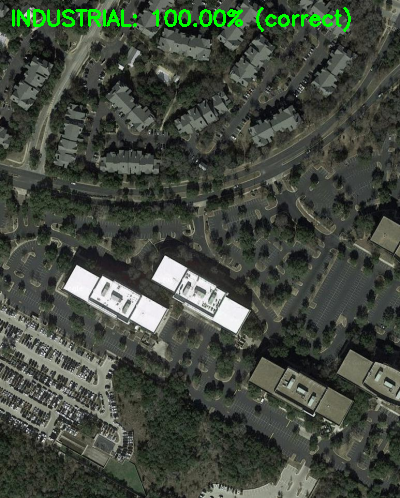

In [67]:
test('testing/INDUSTRIAL_IP.jpg', model, lb)

[INFO] classifying image...
[INFO] RESIDENTIAL: 56.79% (incorrect)


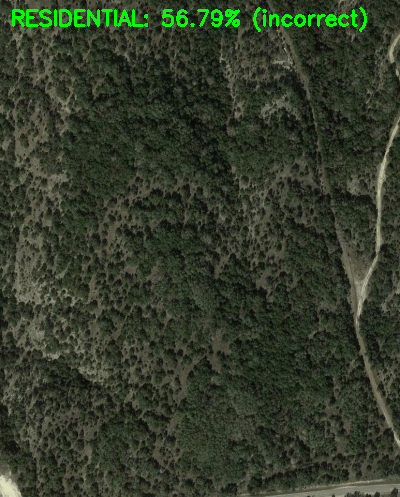

In [68]:
test('testing/INDUSTRIAL_RND.jpg', model, lb)

[INFO] classifying image...
[INFO] COMMERCIAL: 98.44% (correct)


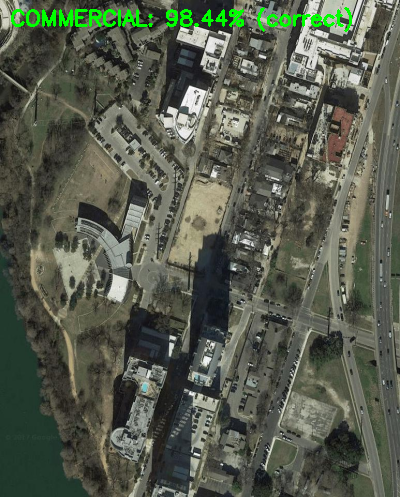

In [69]:
test('testing/COMMERCIAL_CBD.jpg', model, lb)

[INFO] classifying image...
[INFO] COMBINE: 42.98% (correct)


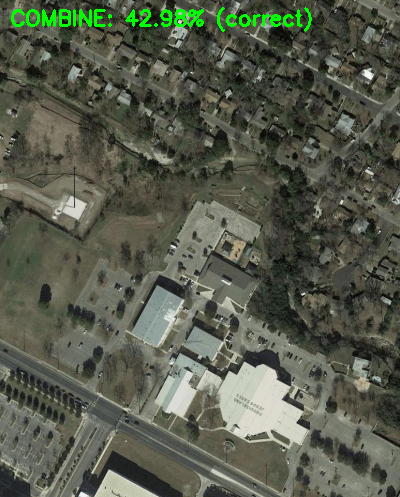

In [73]:
test('testing/COMBINE_LO-V-NP.jpg', model, lb)

[INFO] classifying image...
[INFO] UNCATEGORIZED: 96.52% (incorrect)


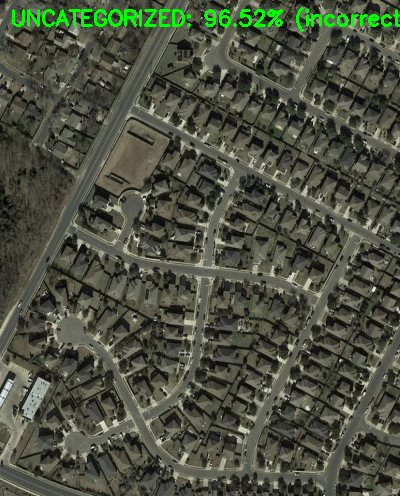

In [78]:
test('testing/RESIDENTIAL_SF-2.jpg', model, lb)